### Let's try to understand how the Machine Learning models work and avoid potential mistakes

In [34]:
# Do the imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('Setup Complete')

Setup Complete


In [35]:
# Load the data
heart_df = pd.read_csv("heart.csv")
heart_df

#1 is heart attack and 0 is no heart attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
#separte the features and the target

X = heart_df.iloc[:,:-1].values
y = heart_df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
y = heart_df.iloc[:,-1].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
#do the train_test split

#test or train size ??

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train

array([[42.,  1.,  1., ...,  2.,  0.,  2.],
       [58.,  1.,  0., ...,  2.,  0.,  3.],
       [46.,  1.,  2., ...,  1.,  0.,  2.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

### - Why do we normalize the data ?
### - When to use fit and transform?
### - Have you heard about data leakage ?

In [46]:
#In standardscaler we bring down all the features to a common scale while keeping the same 
#range of the values
scaler = StandardScaler()  

#X_train = StandardScaler.fit.transform(X_train)

a = scaler.fit(X_train)
X_train = a.transform(X_train)
#The fit method is calculating the mean and variance of each of the features present in our data.
#The transform method is transforming all the features using the respective mean and variance.

#xtest = scaler.fit(Xtest) 
X_test = scaler.transform(X_test)

X_train[:1]

array([[-1.35679832,  0.72250438,  0.00809909, -0.61685555,  0.91403366,
        -0.38330071,  0.8431327 ,  0.53278078, -0.67663234, -0.92086403,
         0.95390513, -0.68970073, -0.50904773]])

In [47]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

### - What is model.fit and model.predict ?

In [48]:
#initalize and fit with Logistic Regression
model = LogisticRegression(random_state = 42)

#initalize the logistic regressor
clf = model.fit(X_train, y_train)
#Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability
#of a categorical dependent variable

#make predictions
predictions = model.predict(X_test)
print(predictions)

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [51]:
#evaluating the performace of our first model
# score =clf.score(?, y_test)
# print(score)

#another way
score2 = metrics.accuracy_score(y_test, predictions)
score2

0.8524590163934426

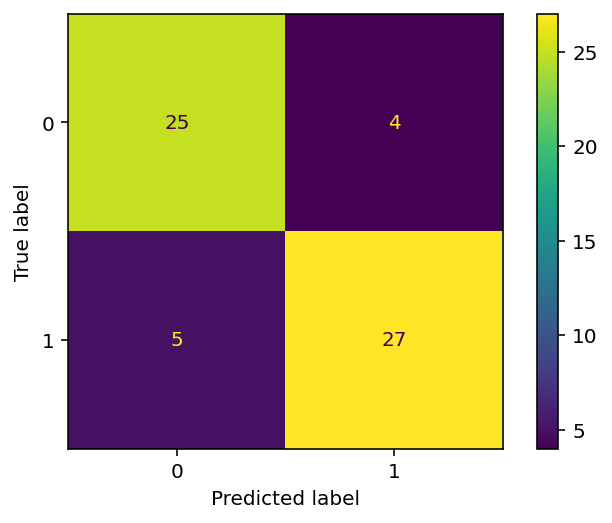

In [52]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

#### Cross-validation
- Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 
- That is, to use a limited sample in order to estimate how the model is expected to perform in 
general when used to make predictions on data and not used during the training of the model.
- CV is used as a first line estimate of model stability, not to estimate performance in real world settings


In [53]:
#cross validate the training set

CV = 5

clf_cv = LogisticRegression(random_state=42).fit(X_train, y_train)
cv = cross_validate(clf_cv, X_train, y_train, cv=CV)

def print_scores(cv):
    [print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])] 
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

Crossvalidation fold: 0  Accruacy: 0.7755102040816326
Crossvalidation fold: 1  Accruacy: 0.8979591836734694
Crossvalidation fold: 2  Accruacy: 0.7708333333333334
Crossvalidation fold: 3  Accruacy: 0.8541666666666666
Crossvalidation fold: 4  Accruacy: 0.7916666666666666
Mean train cross validation score 0.8180272108843537


#### Notice that we used default parameters for the model but can we use other parameters ?
#### Have you heard about hyperparameter tuning?

Algorithm to use in the optimization problem.
- solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.


- multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
- ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary,
- If solver=’liblinear’, and otherwise selects ‘multinomial’.


In [ ]:
#cross validate but with different parameters
clf_cv = LogisticRegression(solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
cv = cross_validate(clf_cv, X, y, cv=5)

def print_scores(cv):
    [print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

#### Pipeline

In [ ]:
#create a pipeline

scaler =StandardScaler();
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial');
pipe = make_pipeline(scaler, clf);
scores = cross_validate(pipe, X, y, cv=5);

print(scores)

#### Rather than trying each algorithm separately, we will train few of them at once

In [54]:

table = PrettyTable()
table.field_names = ["Model","Accuracy", "Mean Squared Error", "R² score","Mean Absolute Error"]
models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski'),
    SVC(kernel='linear',random_state=0),
    GaussianNB(),
    DT(criterion='entropy', random_state=0),
    RF(n_estimators=10, criterion='entropy', random_state=0)
]


for model in models:
    model.fit(X_train, y_train) 
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    table.add_row([type(model).__name__, format(accuracy, '.3f'),format(mse, '.3f'),format(r, '.3f'),format(mae, '.3f')])
    
print(table)

+------------------------+----------+--------------------+----------+---------------------+
|         Model          | Accuracy | Mean Squared Error | R² score | Mean Absolute Error |
+------------------------+----------+--------------------+----------+---------------------+
|   LogisticRegression   |  0.852   |       0.148        |  0.408   |        0.148        |
|  KNeighborsClassifier  |  0.902   |       0.098        |  0.606   |        0.098        |
|          SVC           |  0.869   |       0.131        |  0.474   |        0.131        |
|       GaussianNB       |  0.869   |       0.131        |  0.474   |        0.131        |
| DecisionTreeClassifier |  0.820   |       0.180        |  0.277   |        0.180        |
| RandomForestClassifier |  0.852   |       0.148        |  0.408   |        0.148        |
+------------------------+----------+--------------------+----------+---------------------+
